# Overview
This is the final report for Coursera’s Practical Machine Learning course, as part of the Data Science Specialization track offered by John Hopkins. 

In this project, we will use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants to predict the manner in which they did the exercise. This is the “classe” variable in the training set. We train 4 models: **Decision Tree**, **Random Forest**, **Gradient Boosted Trees**, **Support Vector Machine** using k-folds cross validation on the training set. We then predict using a validation set randomly selected from the training csv data to obtain the **accuracy** and **out of sample error rate**. Based on those numbers, we decide on the best model, and use it to predict 20 cases using the test csv set. (Data Links are Below - Local versions: Downloaded June 16/2020) 


# Background
Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement - a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: (http://groupware.les.inf.puc-rio.br/har) (see the section on the Weight Lifting Exercise Dataset).

The training data for this project are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv

The test data are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

The data for this project come from this source: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har. If you use the document you create for this class for any purpose please cite them as they have been very generous in allowing their data to be used for this kind of assignment.


# Loading Data and Libraries
Loading all the libraries and the data

In [1]:
options(warn = 0)

library(lattice)
library(ggplot2)
library(caret)
library(kernlab)
library(rattle)
library(corrplot)
set.seed(1234)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

corrplot 0.92 loaded



In [11]:
traincsv <- read.csv("../input/data/pml-training.csv")
testcsv <- read.csv("../input/data/pml-testing.csv")

dim(traincsv)
dim(testcsv)

[1] 19622   160

[1] 19622   160

We see that there are 160 variables and 19622 observations in the training set, while 20 for the test set.


# Cleaning the Data

Removing unnecessary variables. Starting with N/A variables.

In [12]:
traincsv <- traincsv[,colMeans(is.na(traincsv)) < .9] #removing mostly na columns
traincsv <- traincsv[,-c(1:7)] #removing metadata which is irrelevant to the outcome

Removing near zero variance variables.

In [13]:
nvz <- nearZeroVar(traincsv)
traincsv <- traincsv[,-nvz]
dim(traincsv)

[1] 19622    53

Now that we have finished removing the unnecessary variables, we can now split the training set into a **validation** and sub **training** set. The testing set "testcsv" will be left alone, and used for the final quiz test cases. 

In [14]:
inTrain <- createDataPartition(y=traincsv$classe, p=0.7, list=F)
train <- traincsv[inTrain,]
valid <- traincsv[-inTrain,]

# Creating and Testing the Models
Here we will test a few popular models including: **Decision Trees**, **Random Forest**, **Gradient Boosted Trees**, and **SVM**. This is probably more than we will need to test, but just out of curiosity and good practice we will run them for comparison.

Set up control for training to use 3-fold cross validation. 

In [15]:
control <- trainControl(method="cv", number=3, verboseIter=F)

## Decision Tree

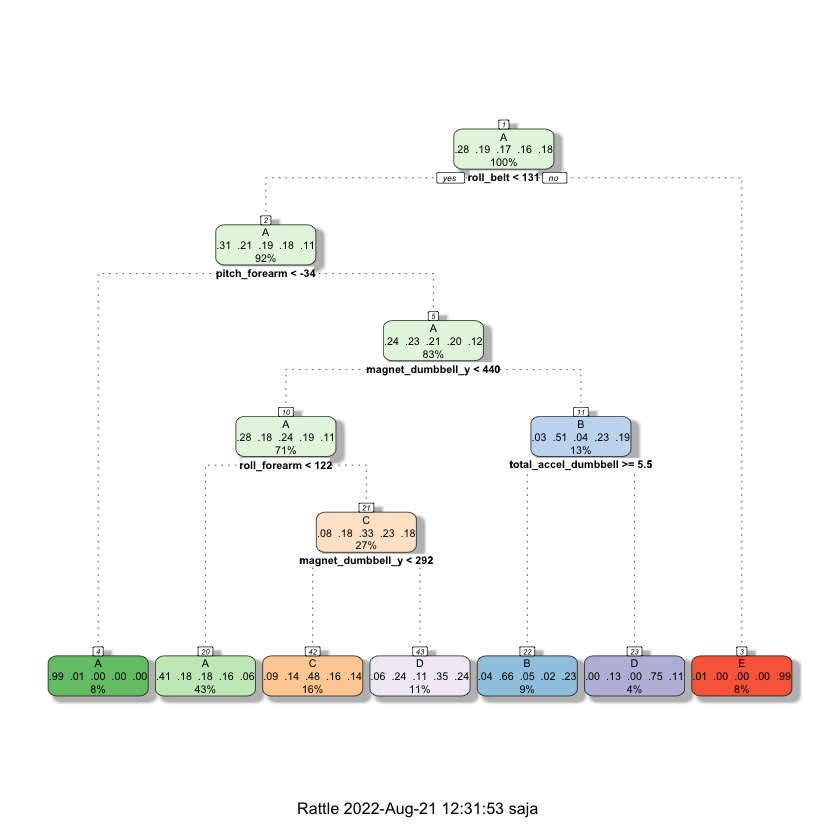

In [16]:
mod_trees <- train(classe~., data=train, method="rpart", trControl = control, tuneLength = 5)
fancyRpartPlot(mod_trees$finalModel)

In [17]:
pred_trees <- predict(mod_trees, valid)
cmtrees <- confusionMatrix(factor(valid$classe), pred_trees)
cmtrees

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1519   28   83   40    4
         B  473  355  117  194    0
         C  484   45  423   74    0
         D  451   10  131  372    0
         E  156  130  131  176  489

Overall Statistics
                                          
               Accuracy : 0.5366          
                 95% CI : (0.5238, 0.5494)
    No Information Rate : 0.5239          
    P-Value [Acc > NIR] : 0.02588         
                                          
                  Kappa : 0.3957          
                                          
 Mcnemar's Test P-Value : < 2e-16         

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.4927  0.62500  0.47797  0.43458  0.99189
Specificity            0.9447  0.85255  0.87940  0.88228  0.89002
Pos Pred Value         0.9074  0.31168  0.41228  0.38589  0.45194
Neg Pred Value         0.6286  0.9551

## Random Forrest

In [25]:
mod_rf <- train(classe~., data=train, method="rf", trControl = control, tuneLength = 5)

pred_rf <- predict(mod_rf, valid)
cmrf <- confusionMatrix(pred_rf, factor(valid$classe))
cmrf

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1673    4    0    0    0
         B    1 1131   11    0    0
         C    0    4 1014    6    0
         D    0    0    1  957    0
         E    0    0    0    1 1082

Overall Statistics
                                          
               Accuracy : 0.9952          
                 95% CI : (0.9931, 0.9968)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.994           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9994   0.9930   0.9883   0.9927   1.0000
Specificity            0.9991   0.9975   0.9979   0.9998   0.9998
Pos Pred Value         0.9976   0.9895   0.9902   0.9990   0.9991
Neg Pred Value         0.9998   0.998

## Gradient Boosted Trees

In [20]:
mod_gbm <- train(classe~., data=train, method="gbm", trControl = control, tuneLength = 5, verbose = F)

pred_gbm <- predict(mod_gbm, valid)
cmgbm <- confusionMatrix(pred_gbm, factor(valid$classe))
cmgbm

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1670    6    0    0    0
         B    2 1123   14    0    0
         C    2   10 1009    9    2
         D    0    0    3  952    1
         E    0    0    0    3 1079

Overall Statistics
                                          
               Accuracy : 0.9912          
                 95% CI : (0.9884, 0.9934)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9888          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9976   0.9860   0.9834   0.9876   0.9972
Specificity            0.9986   0.9966   0.9953   0.9992   0.9994
Pos Pred Value         0.9964   0.9860   0.9777   0.9958   0.9972
Neg Pred Value         0.9990   0.996

## Support Vector Machine

In [21]:
mod_svm <- train(classe~., data=train, method="svmLinear", trControl = control, tuneLength = 5, verbose = F)

pred_svm <- predict(mod_svm, valid)
cmsvm <- confusionMatrix(pred_svm, factor(valid$classe))
cmsvm

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1537  154   79   69   50
         B   29  806   90   46  152
         C   40   81  797  114   69
         D   61   22   32  697   50
         E    7   76   28   38  761

Overall Statistics
                                          
               Accuracy : 0.7813          
                 95% CI : (0.7705, 0.7918)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.722           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9182   0.7076   0.7768   0.7230   0.7033
Specificity            0.9164   0.9332   0.9374   0.9665   0.9690
Pos Pred Value         0.8137   0.7177   0.7239   0.8086   0.8363
Neg Pred Value         0.9657   0.930

## Results (Accuracy & Out of Sample Error)

In [22]:
mod_svm <- train(classe~., data=train, method="svmLinear", trControl = control, tuneLength = 5, verbose = F)

pred_svm <- predict(mod_svm, valid)
cmsvm <- confusionMatrix(pred_svm, factor(valid$classe))
cmsvm

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1537  154   79   69   50
         B   29  806   90   46  152
         C   40   81  797  114   69
         D   61   22   32  697   50
         E    7   76   28   38  761

Overall Statistics
                                          
               Accuracy : 0.7813          
                 95% CI : (0.7705, 0.7918)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.722           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9182   0.7076   0.7768   0.7230   0.7033
Specificity            0.9164   0.9332   0.9374   0.9665   0.9690
Pos Pred Value         0.8137   0.7177   0.7239   0.8086   0.8363
Neg Pred Value         0.9657   0.930

**The best model is the Random Forest model, with `r cmrf$overall[1]` accuracy and `r 1-cmrf$overall[1]` out of sample error rate. We find that to be a sufficient enough model to use for our test sets.** 


# Predictions on Test Set

Running our test set to predict the classe (5 levels) outcome for 20 cases with the **Random Forest** model.

In [26]:
pred <- predict(mod_rf, testcsv)
print(pred)

    [1] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
   [37] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
   [73] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [109] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [145] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [181] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [217] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [253] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [289] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [325] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [361] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [397] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
  [433] A A A A A A A A A A A A A A A A 

### Appendix

Github Repo: [Github](https://github.com/b-zhang93/Practical-Machine-Learning-Project)

correlation matrix of variables in training set

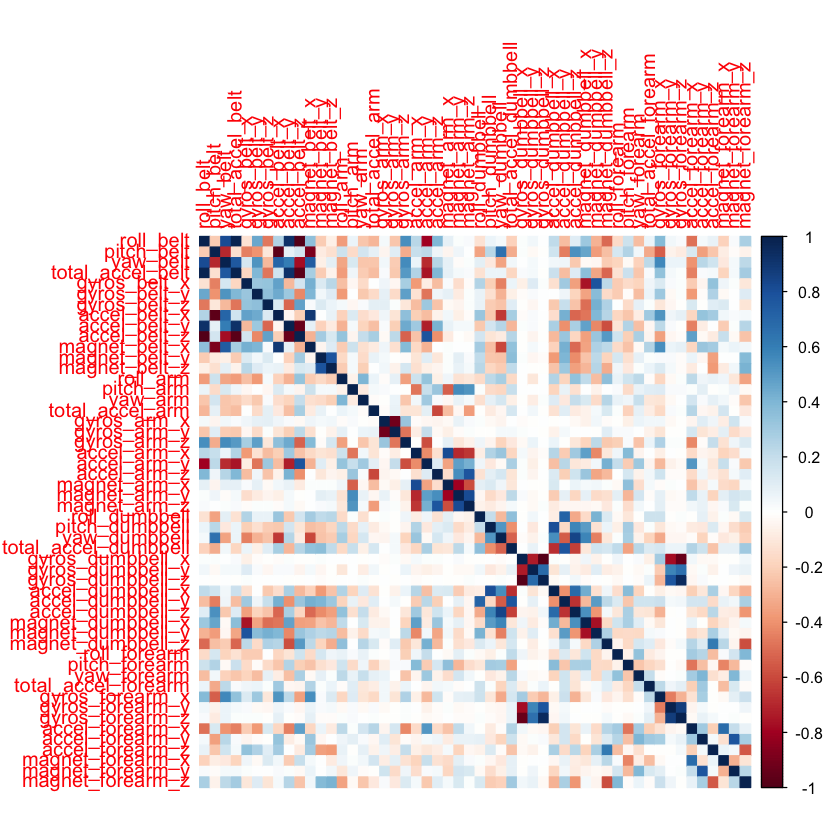

In [27]:
corrPlot <- cor(train[, -length(names(train))])
corrplot(corrPlot, method="color")

Plotting the models

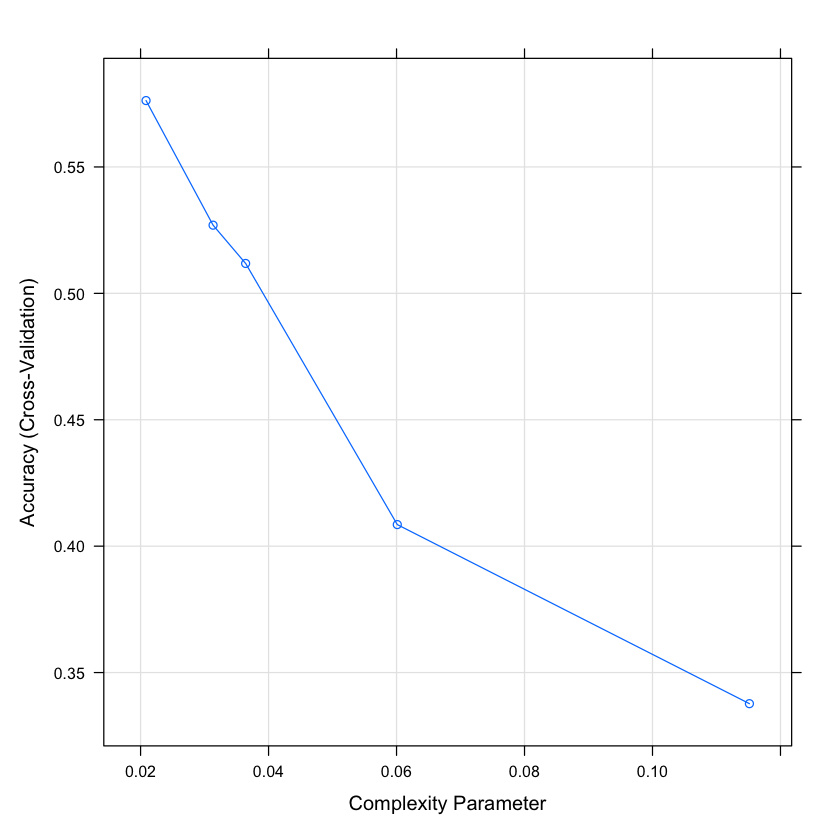

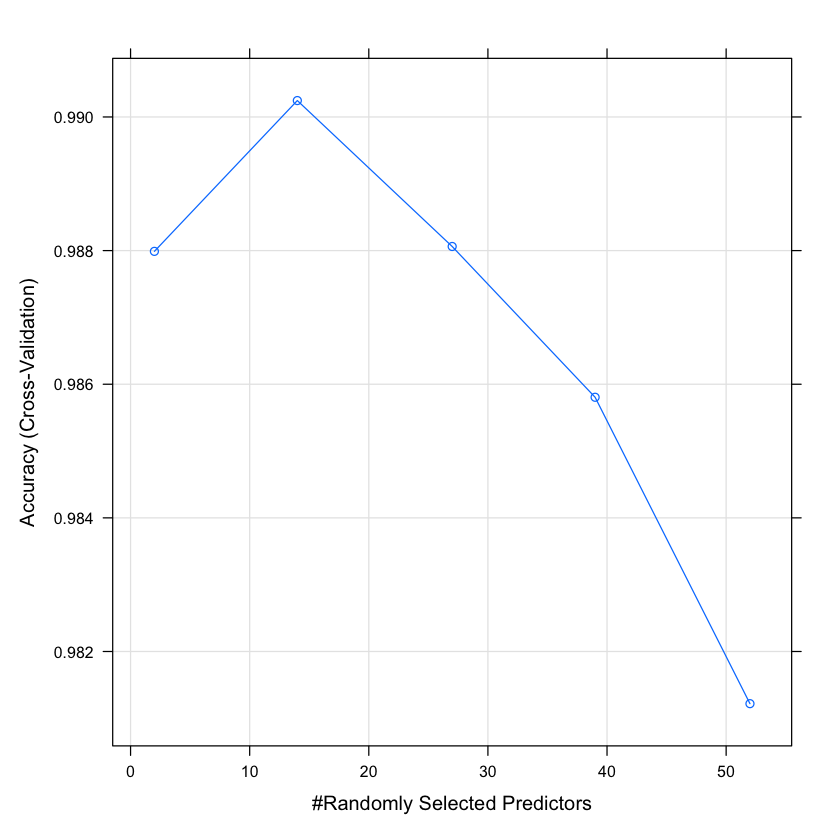

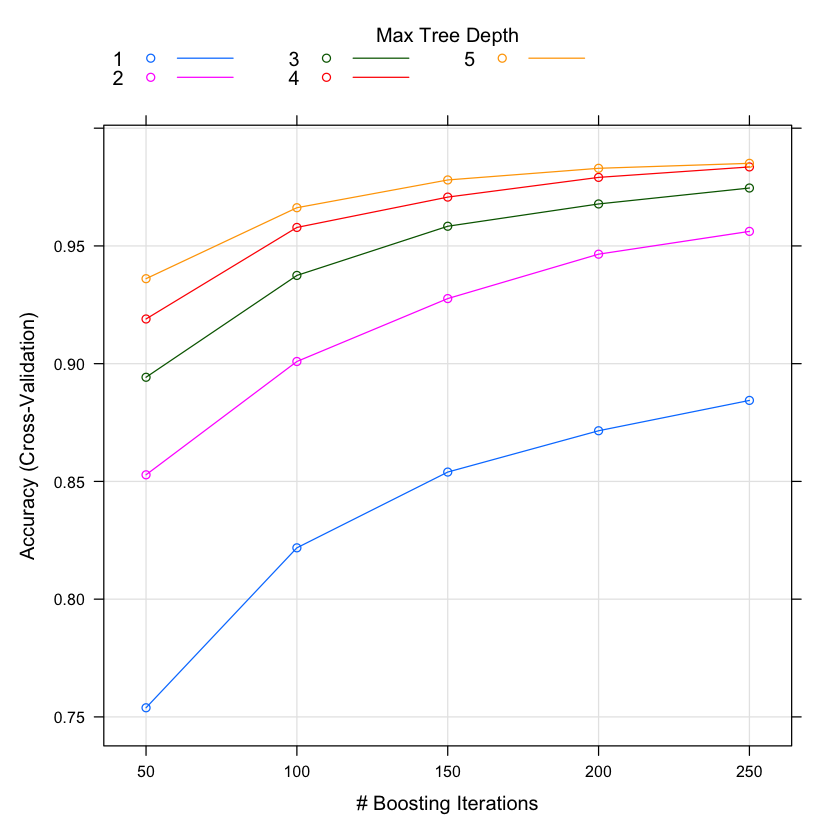

In [28]:
plot(mod_trees)
plot(mod_rf)
plot(mod_gbm)